# Notebook para la unificación de datasets

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PATH = r'/content/drive/My Drive/Colab Notebooks/'

# Carga de datos

In [8]:
#Se cargan todos los archivos procedenetes de la obtención de datos en diferentes barridos
data0 = pd.read_csv(PATH + "output_plotdata_HF_ccpvdz_continua.csv")
data1 = pd.read_csv(PATH + "output_plotdata_HF_ccpvdz_inner.csv")
data2 = pd.read_csv(PATH + "output_plotdata_HF_ccpvdz_inner_2.csv")
data3 = pd.read_csv(PATH + "output_plotdata_ccpvdz_HF_minimo.csv")

#Como la molécula es simétrica se simetrizan los datos repecto de los radios y después se eliminan duplicados
#Esto se hace porque si hay un dato para un rh1 y rh2 determinados, será la misma anergía si se cambia rh1 por rh2
#de este modo puede que consigamos un conjunto de datos mayor
dataA = pd.concat([data0, data1, data2, data3])
dataB = pd.concat([data0, data1, data2, data3])
dataB= dataB.rename(columns={"rh2": "rh1", "rh1": "rh2"})
data = pd.concat([dataA, dataB])
data = data.drop_duplicates()

#Se resetea el índice por que si se han incluido filas en el paso anterior, evitar indices duplicados
data = data.reset_index()
data = data.drop('index', axis='columns')

#Para facilitar la inspección del data_frame
data.sort_values(by=['ang', 'rh1', 'rh2'])

#Se lmacenan los resultados en un csv
data.to_csv(PATH + 'data_h2o_HF_ccpvdz.csv',index=True)
data.describe().to_csv(PATH + 'describe_data_h2o_HF_ccpvdz.csv',index=True)

# Estadísticos

In [7]:
data.describe()

,rh1,rh2,ang,energia
count,17636.000000,17636.000000,17636.000000,17636.000000
mean,1.718462,1.718462,104.482706,-75.741635
std,0.465277,0.465277,4.329904,0.428579
min,0.800000,0.800000,94.500000,-76.027388
25%,1.400000,1.400000,102.500000,-75.992674
50%,1.708000,1.708000,104.500000,-75.924886
75%,2.025000,2.025000,106.500000,-75.722473
max,2.800000,2.800000,114.500000,-72.066162


# Distribuciones

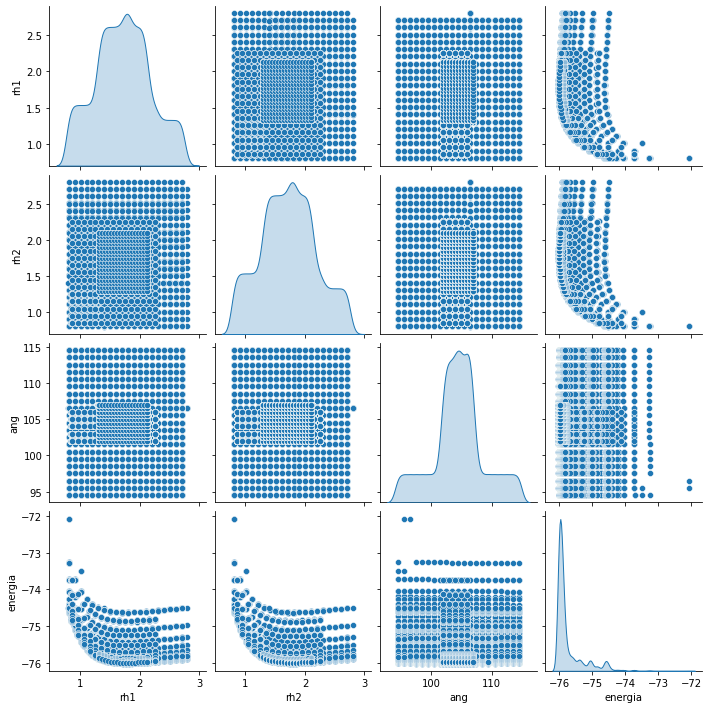

,count,mean,std,min,25%,50%,75%,max
rh1,17636.0,1.718462,0.465277,0.800000,1.400000,1.708000,2.025000,2.800000
rh2,17636.0,1.718462,0.465277,0.800000,1.400000,1.708000,2.025000,2.800000
ang,17636.0,104.482706,4.329904,94.500000,102.500000,104.500000,106.500000,114.500000
energia,17636.0,-75.741635,0.428579,-76.027388,-75.992674,-75.924886,-75.722473,-72.066162


In [ ]:
sns.pairplot(data[["rh1", "rh2", "ang", "energia"]], diag_kind="kde")
plt.show()